In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

from subprocess import check_output


train = pd.read_csv('../titanic/train.csv')
test = pd.read_csv('../titanic/test.csv')


test_shape=test.shape
train_shape=train.shape

print(test_shape)
print(train_shape)

train.head()

(418, 11)
(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
sep_forward = train["Name"].str.split(",",expand=True)
sep_backward = sep_forward[1].str.split(".",expand=True)
Honorific = sep_backward[0].str.replace(" ","")
train["Honorific"] =Honorific

display(train["Honorific"].unique())
#array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
#       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
#       ' the Countess', ' Jonkheer'], dtype=object)
display(train["Honorific"])

display(train.groupby(by=["Honorific"]).count())
display(train[train["Honorific"]=="Dr"])

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'theCountess',
       'Jonkheer'], dtype=object)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Honorific, Length: 891, dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Honorific,,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1,1
Col,2,2,2,2,2,2,2,2,2,2,1,2
Don,1,1,1,1,1,1,1,1,1,1,0,1
Dr,7,7,7,7,7,6,7,7,7,7,3,7
Jonkheer,1,1,1,1,1,1,1,1,1,1,0,1
Lady,1,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2,2
Master,40,40,40,40,40,36,40,40,40,40,7,40
Miss,182,182,182,182,182,146,182,182,182,182,47,181


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Dr
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Dr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Dr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Dr
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,Dr
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,Dr
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr


In [75]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [76]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
def null_table(df):
    null_val=df.isnull().sum()
    parcent=100*df.isnull().sum()/len(df)
    null_table=pd.concat([null_val,parcent],axis=1)
    null_table_columns=null_table.rename(
    columns={0:'null',1:'parcent'})
    return null_table_columns

null_table(train)

,null,parcent
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [15]:
null_table(test)

,null,parcent
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


([array([ 80.,  97., 372.]), array([216., 184., 491.])],
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 2 Lists of Patches objects>)

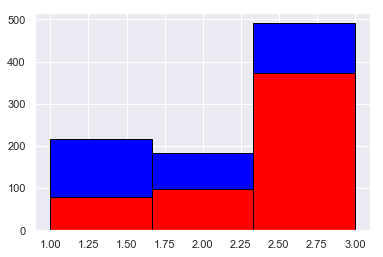

In [16]:

histogram=[]
for survived in[0,1]:
    histogram.append(train[train.Survived==survived])

temp = [i["Pclass"].dropna() for i in histogram]
plt.hist(temp, histtype="barstacked", bins=3,color=['red','blue'],ec='black')

([array([468.,  81.]), array([577., 314.])],
 array([0. , 0.5, 1. ]),
 <a list of 2 Lists of Patches objects>)

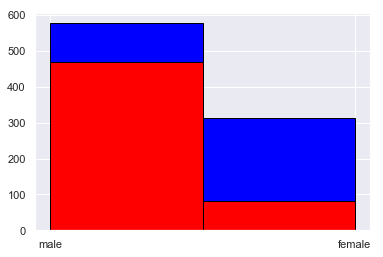

In [26]:
temp = [i["Sex"].dropna() for i in histogram]
plt.hist(temp, histtype="barstacked", bins=2,color=['red','blue'],ec='black')

([array([13.,  5., 11., 16., 52., 62., 55., 49., 38., 28., 23., 23., 15.,
          9.,  8.,  7.,  4.,  5.,  1.,  0.]),
  array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
         16., 13., 11.,  4.,  5.,  1.,  1.])],
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 2 Lists of Patches objects>)

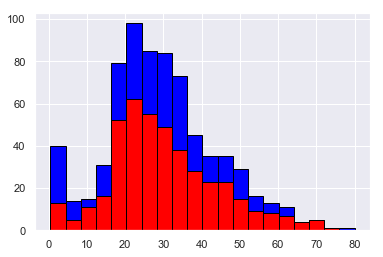

In [27]:
temp = [i["Age"].dropna() for i in histogram]
plt.hist(temp, histtype="barstacked", bins=20,color=['red','blue'],ec='black')

([array([398.,  97.,  15.,  12.,  15.,   5.,   0.,   7.]),
  array([608., 209.,  28.,  16.,  18.,   5.,   0.,   7.])],
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 2 Lists of Patches objects>)

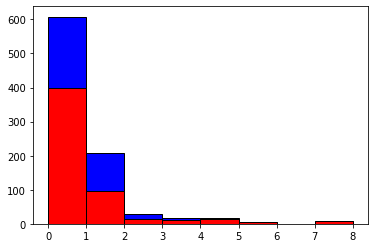

In [20]:
temp = [i["SibSp"].dropna() for i in histogram]
plt.hist(temp, histtype="barstacked", bins=8,color=['red','blue'],ec='black')

([array([445.,  53.,  40.,   2.,   4.,   5.]),
  array([678., 118.,  80.,   5.,   4.,   6.])],
 array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 2 Lists of Patches objects>)

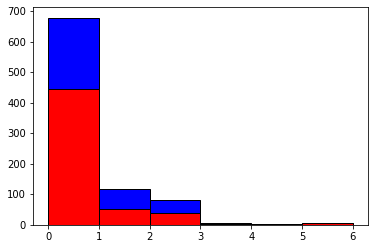

In [21]:
temp = [i["Parch"].dropna() for i in histogram]
plt.hist(temp, histtype="barstacked", bins=6,color=['red','blue'],ec='black')

([array([427.,  47.,  75.]), array([644.,  77., 168.])],
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 2 Lists of Patches objects>)

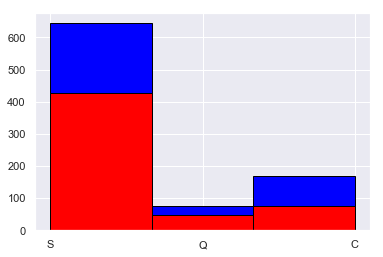

In [28]:
temp = [i["Embarked"].dropna() for i in histogram]
plt.hist(temp, histtype="barstacked", bins=3,color=['red','blue'],ec='black')

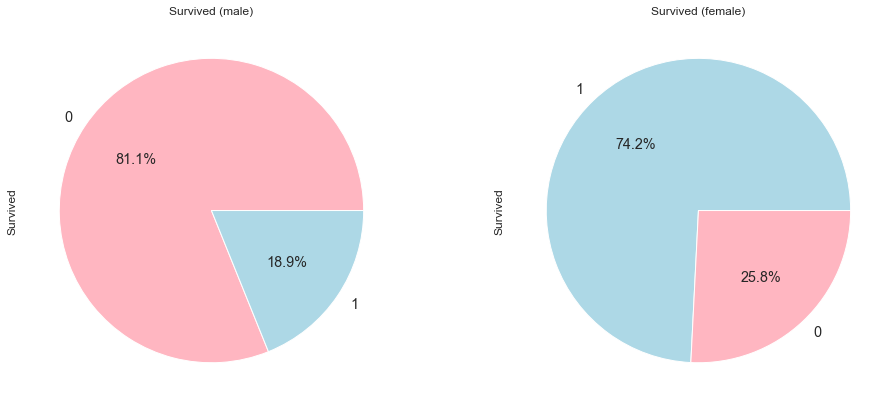

In [29]:
f,ax=plt.subplots(1,2,figsize=(16,7))
train['Survived'][train['Sex']=='male'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],colors=["lightpink","lightblue"],textprops={ 'size': 'large'})
train['Survived'][train['Sex']=='female'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],colors=["lightblue","lightpink"] ,textprops={ 'size': 'large'})
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

In [38]:
print("% of survivals in") 
print("Pclass=1 : ", train.Survived[train.Pclass == 1].sum()/train[train.Pclass == 1].Survived.count())
print("Pclass=2 : ", train.Survived[train.Pclass == 2].sum()/train[train.Pclass == 2].Survived.count())
print("Pclass=3 : ", train.Survived[train.Pclass == 3].sum()/train[train.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


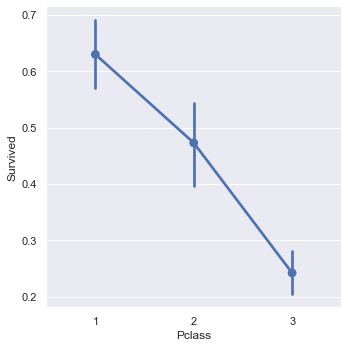

In [34]:
sns.catplot('Pclass','Survived', kind='point', data=train);

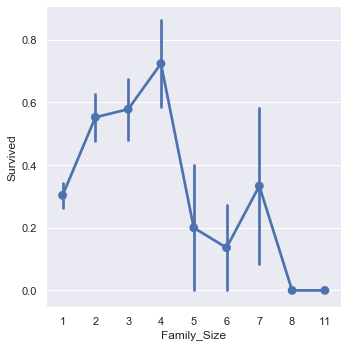

In [36]:
sns.catplot('Family_Size','Survived', kind='point', data=train);

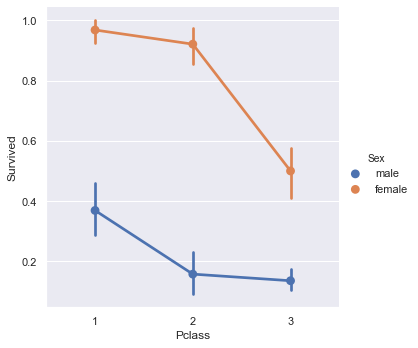

In [43]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', colors=["lightblue","lightpink"] ,data=train);

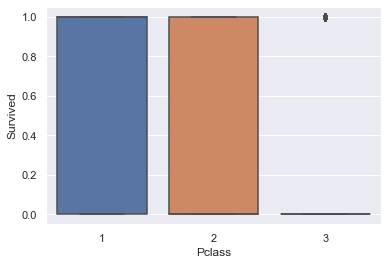

In [40]:
sns.boxplot('Pclass','Survived',data=train)

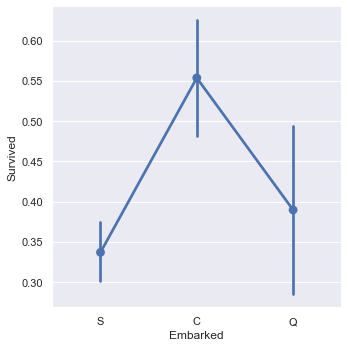

In [35]:
sns.catplot('Embarked','Survived', kind='point', data=train);

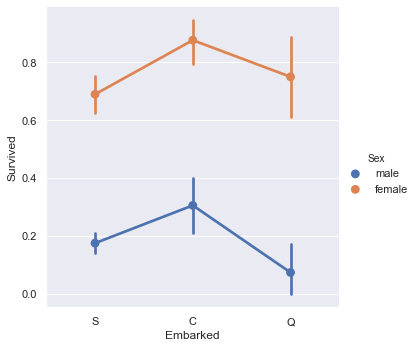

In [63]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=train);

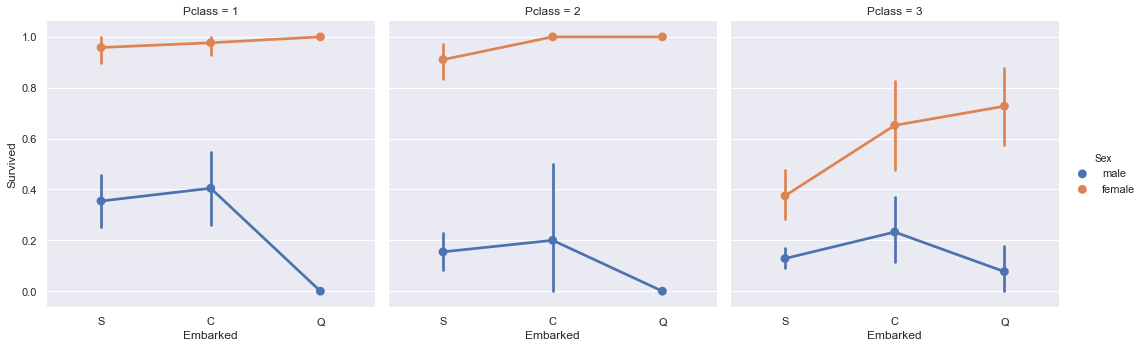

In [66]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=train);

In [67]:
pd.crosstab([train.Survived], [train.Sex, train.Pclass, train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

In [50]:
for df in [train, test]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i

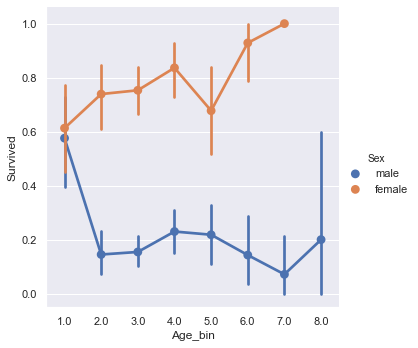

In [57]:
sns.catplot('Age_bin','Survived',hue= 'Sex',kind='point',data=train);

In [6]:
pd.crosstab([train.Sex, train.Survived], [train.Age_bin, train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

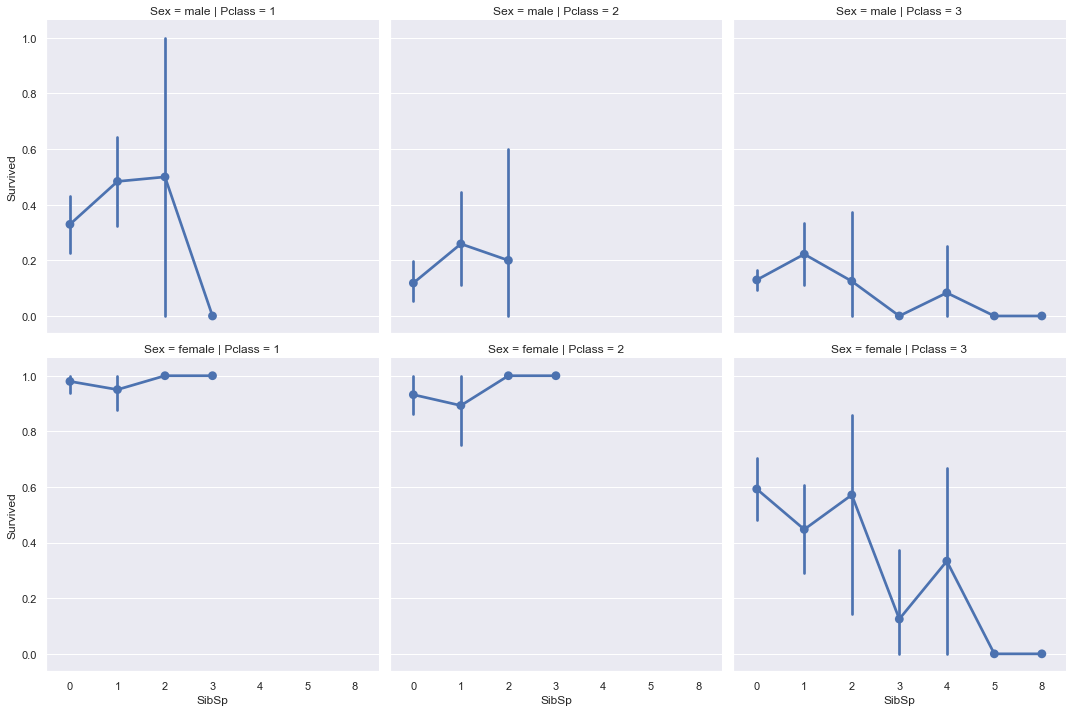

In [5]:
sns.catplot('SibSp','Survived', col='Pclass' , row = 'Sex', kind='point', data=train);